In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [3]:
IMG_SIZE=224
BATCH_SIZE=32

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training')

Found 333 images belonging to 1 classes.


In [6]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset',
target_size=(IMG_SIZE, IMG_SIZE), # Add target_size here
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation')

Found 83 images belonging to 1 classes.


In [7]:
from tensorflow.keras.layers import Input

model = keras.Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Explicitly define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
 model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [10]:
 model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7060 - loss: 0.2122

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.7225 - loss: 0.2003 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [11]:
model.save('/content/drive/MyDrive/Dataset.h5')

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('/content/drive/MyDrive/Dataset.h5')
print("Model Loaded")

Model Loaded


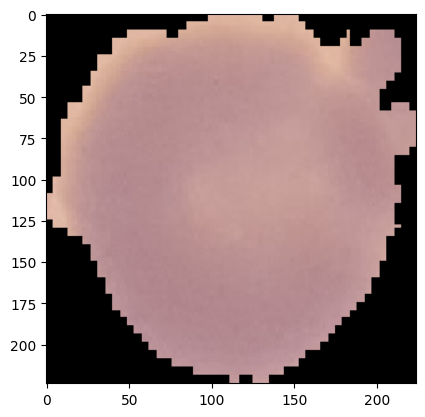

In [14]:
 test_image_path="/content/drive/MyDrive/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_143.png"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [16]:
 img_array /= 255.

In [17]:
 prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [19]:
 prediction = model.predict(img_array)
 # Print the prediction
 print(prediction)
 if prediction >= 0.5:
   print("Infected with Malaria.")
 else:
    print("Not infected with Malaria.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.]]
Not infected with Malaria.
